# backward selection

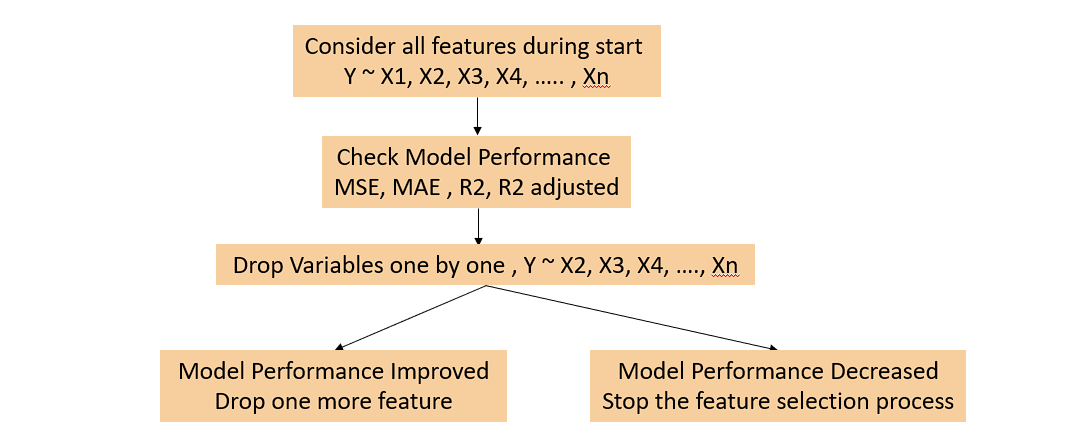

In [54]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd

In [55]:
df=pd.read_csv('Cars93.csv',na_values=['','NA'],keep_default_na=False)

In [56]:
m=df.isna().sum()

In [57]:
m[m>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [58]:
x=df.drop(columns=['id','Weight'])

In [59]:
x

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,21.1,7,187,115,72,38,34.0,NaN,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,18.5,5,180,103,67,35,31.5,14.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,18.5,4,159,97,66,36,26.0,15.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,15.8,5,190,104,67,37,29.5,14.0,non-USA,Volvo 240


In [60]:
y=df[['Weight']]

In [61]:
y

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640
...,...
88,3960
89,2985
90,2810
91,2985


In [62]:
cat=list(x.columns[x.dtypes=='object'])
con=list(x.columns[x.dtypes!='object'])

In [63]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [64]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [66]:
num_pipe1=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                             ('scaler',StandardScaler())])

In [67]:
cat_pipe1=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                             ('scaler',OrdinalEncoder())])

In [68]:
pre1=ColumnTransformer([('num',num_pipe1,con),
                        ('cat',cat_pipe1,cat)]).set_output(transform='pandas')

In [69]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Min.Price', 'Price', 'Max.Price', 'MPG.city',
                                  'MPG.highway', 'EngineSize', 'Horsepower',
                                  'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
                                  'Passengers', 'Length', 'Wheelbase', 'Width',
                                  'Turn.circle', 'Rear.seat.room',
                                  'Luggage.room']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', OrdinalEncoder())]),
                                 ['Manufacturer', 'Model', 'Type', 'AirBags',
                                  'DriveTrain', 'Cylinders', 'Man.trans.avail',
                                  'Origin', 'Make'])])

In [70]:
x_pre=pre1.fit_transform(x)

In [71]:
x_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,num__Luggage.room,cat__Manufacturer,cat__Model,cat__Type,cat__AirBags,cat__DriveTrain,cat__Cylinders,cat__Man.trans.avail,cat__Origin,cat__Make
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,-1.033015,0.0,48.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.396643,0.0,55.0,2.0,0.0,1.0,3.0,1.0,1.0,1.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.039228,1.0,8.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,1.111472,1.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,-0.318186,2.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,4.0


#### feature selection

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
from sklearn.feature_selection import SequentialFeatureSelector
lr=LinearRegression()
sel=SequentialFeatureSelector(estimator=lr,direction='backward',n_features_to_select='auto')

In [74]:
sel.fit_transform(x_pre,y)

array([[-0.37572014,  0.36092485, -0.07348445, ...,  2.        ,
         1.        ,  1.        ],
       [ 1.49784409, -0.77051373,  1.07832243, ...,  0.        ,
         3.        ,  1.        ],
       [ 0.99822696, -0.58194063,  0.54081255, ...,  1.        ,
         3.        ,  1.        ],
       ...,
       [ 0.39452293, -0.77051373,  0.65599324, ...,  2.        ,
         3.        ,  1.        ],
       [ 0.33207079, -0.20479444, -0.57260077, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.7484184 , -0.20479444,  0.46402543, ...,  0.        ,
         2.        ,  1.        ]])

In [75]:
sel_cols=sel.get_feature_names_out()

In [76]:
sel_cols

array(['num__Price', 'num__MPG.highway', 'num__Horsepower', 'num__RPM',
       'num__Fuel.tank.capacity', 'num__Passengers', 'num__Length',
       'num__Wheelbase', 'cat__Manufacturer', 'cat__Type', 'cat__AirBags',
       'cat__Cylinders', 'cat__Origin'], dtype=object)

In [77]:
len(sel_cols)

13

In [78]:
sel_cols[0]

'num__Price'

In [79]:
sel_cols[0].split('__')

['num', 'Price']

In [80]:
imp_cols=[]
for i in sel_cols:
    s=i.split('__')[1]
    imp_cols.append(s)

In [81]:
imp_cols

['Price',
 'MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Manufacturer',
 'Type',
 'AirBags',
 'Cylinders',
 'Origin']

In [82]:
x_sel=x[imp_cols]

In [83]:
x_sel

,Price,MPG.highway,Horsepower,RPM,Fuel.tank.capacity,Passengers,Length,Wheelbase,Manufacturer,Type,AirBags,Cylinders,Origin
0,15.9,31,140,6300,13.2,5,177,102,Acura,Small,None,4,non-USA
1,33.9,25,200,5500,18.0,5,195,115,Acura,Midsize,Driver & Passenger,6,non-USA
2,29.1,26,172,5500,16.9,5,180,102,Audi,Compact,Driver only,6,non-USA
3,37.7,26,172,5500,21.1,6,193,106,Audi,Midsize,NaN,6,non-USA
4,30.0,30,208,5700,21.1,4,186,109,BMW,Midsize,Driver only,4,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,19.7,21,109,4500,21.1,7,187,115,Volkswagen,Van,None,5,non-USA
89,20.0,30,134,5800,18.5,5,180,103,Volkswagen,Compact,None,4,non-USA
90,23.3,25,178,5800,18.5,4,159,97,Volkswagen,Sporty,None,6,non-USA
91,22.7,28,114,5400,15.8,5,190,104,Volvo,Compact,Driver only,4,non-USA


In [84]:
cat_sel=list(x_sel.columns[x_sel.dtypes=='object'])

In [85]:
con_sel=list(x_sel.columns[x_sel.dtypes!='object'])

In [86]:
cat_sel

['Manufacturer', 'Type', 'AirBags', 'Cylinders', 'Origin']

In [87]:
con_sel

['Price',
 'MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase']

In [88]:
from sklearn.preprocessing import OneHotEncoder

In [89]:
num_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                          ('scaler',StandardScaler())])

In [90]:
cat_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                          ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [91]:
pre2=ColumnTransformer([('num',num_pipe2,con_sel),
                        ('cat',cat_pipe2,cat_sel)]).set_output(transform='pandas')

In [92]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Price', 'MPG.highway', 'Horsepower', 'RPM',
                                  'Fuel.tank.capacity', 'Passengers', 'Length',
                                  'Wheelbase']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Type', 'AirBags',
                                  'Cylinders', 'Origin'])])

In [93]:
x_sel_pre=pre2.fit_transform(x_sel)

In [94]:
x_sel_pre

,num__Price,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,cat__Manufacturer_Acura,cat__Manufacturer_Audi,...,cat__AirBags_Driver only,cat__AirBags_None,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
0,-0.375720,0.360925,-0.073484,1.717489,-1.062184,-0.083243,-0.427186,-0.286932,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.497844,-0.770514,1.078322,0.369586,0.409445,-0.083243,0.812171,1.629649,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.998227,-0.581941,0.540813,0.369586,0.072197,-0.083243,-0.220626,-0.286932,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.893374,-0.581941,0.540813,0.369586,1.359872,0.884457,0.674465,0.302785,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.091905,0.172352,1.231897,0.706562,1.359872,-1.050944,0.192493,0.745073,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.019810,-1.524806,-0.668585,-1.315292,1.359872,1.852158,0.261346,1.629649,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
89,0.051036,0.172352,-0.188665,0.875050,0.562740,-0.083243,-0.220626,-0.139503,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
90,0.394523,-0.770514,0.655993,0.875050,0.562740,-1.050944,-1.666543,-1.024079,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
91,0.332071,-0.204794,-0.572601,0.201098,-0.265051,-0.083243,0.467905,0.007926,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### train_test_split

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sel_pre,y,train_size=0.2,random_state=21)

In [97]:
xtrain.head()

,num__Price,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,cat__Manufacturer_Acura,cat__Manufacturer_Audi,...,cat__AirBags_Driver only,cat__AirBags_None,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
41,-0.771250,3.189521,-0.802962,1.043537,-1.460750,-1.050944,-0.702598,-0.139503,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
90,0.394523,-0.770514,0.655993,0.875050,0.562740,-1.050944,-1.666543,-1.024079,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
76,0.509019,-0.204794,0.502419,-0.809828,0.409445,0.884457,-0.427186,1.039932,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20,-0.386129,-0.204794,-0.054288,-0.472853,-0.203734,0.884457,-0.014067,0.007926,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
59,-0.563077,-0.581941,-0.841356,0.790806,-1.706021,-1.050944,-1.184570,-1.318938,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [98]:
xtest.head()

,num__Price,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,cat__Manufacturer_Acura,cat__Manufacturer_Audi,...,cat__AirBags_Driver only,cat__AirBags_None,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
23,-0.854520,-0.016221,-0.975733,-0.809828,-0.816912,-0.083243,-0.771452,-1.024079,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
86,0.332071,-1.336233,-0.111878,-0.472853,0.961306,1.852158,0.261346,1.334791,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
91,0.332071,-0.204794,-0.572601,0.201098,-0.265051,-0.083243,0.467905,0.007926,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
21,1.039862,-0.581941,0.060893,-0.809828,-0.203734,0.884457,1.362996,0.892502,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
17,-0.073868,-0.581941,0.502419,-1.820755,1.942392,0.884457,2.120381,1.777079,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [99]:
ytrain.head()

,Weight
41,2350
90,2810
76,3495
20,3085
59,2450


In [100]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


##### model bullding

In [101]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [102]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

In [122]:
model.score(xtest,ytest)

0.8555858527610168

In [120]:
def evaluation(model,x,y):
    ypred=model.predict(x)
    mse=mean_squared_error(y,ypred)
    mae=mean_absolute_error(y,ypred)
    mape=mean_absolute_percentage_error(y,ypred)
    r2=r2_score(y,ypred)
    rmse=mse**(1/2)

    print(f'mean squared error: {mse:.2f}')
    print(f'mean absolute error: {mae:.2f}')
    print(f'mean absolute percentage error: {mape:.2f}')
    print(f'root mean squared error: {rmse:.2f}')
    print(f'r2_score: {r2:.2f}')

In [121]:
evaluation(model,xtrain,ytrain)

mean squared error: 0.00
mean absolute error: 0.00
mean absolute percentage error: 0.00
root mean squared error: 0.00
r2_score: 1.00


In [116]:
evaluation(model,xtest,ytest)

mean squared error: 49668.81
mean absolute error: 173.74
mean absolute percentage error: 0.06
root mean squared error: 222.87
r2_score: 0.85


In [117]:
model.score(xtrain,ytrain)

1.0

In [118]:
model.score(xtest,ytest)

0.8555858527610168

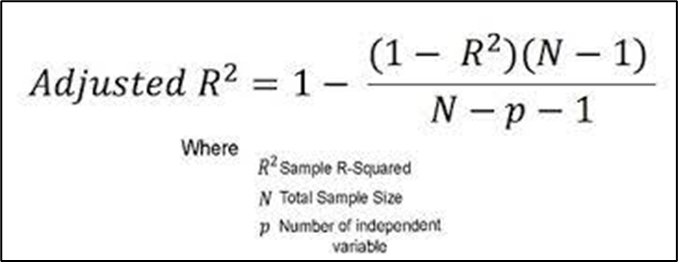

In [108]:
xtrain.shape

(18, 57)

In [109]:
xtrain.shape[1]

57

In [110]:
xtrain.shape[0]

18

In [123]:
def adj_r2(model,xtrain,ytrain):
    r2=model.score(xtrain,ytrain)
    n=xtrain.shape[0]
    p=xtrain.shape[1]
    num=(1-r2)*(n-1)
    den=n-p-1
    adjusted=1-num/den
    return adjusted



In [124]:
adj_r2(model,xtrain,ytrain)

1.0

In [119]:
r2_adj(model,xtrain,ytrain)

NameError: name 'r2_adj' is not defined

In [ ]:
model.score(xtest,ytest)

0.8555858527610168

In [ ]:
# out of sample data predictions

In [ ]:
x_new=pd.read_csv('sample.csv',na_values=['','NA'],keep_default_na=False)